In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"c:/Users/sastu/Downloads/crime.csv", encoding = 'latin-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Original data is not in the time series modeling format so aggregating the records at year and month level by taking the count of incident numbers in the below mentioned steps

In [3]:
df = df[['INCIDENT_NUMBER', 'YEAR', 'MONTH']]

In [4]:
df.MONTH = df.MONTH.astype('str')
df.YEAR = df.YEAR.astype('str')

In [5]:
df['MONTH'] = df['MONTH'].apply(lambda x: x.zfill(2))

In [6]:
df['Year_Month'] = df.YEAR + '-' + df.MONTH

In [7]:
df = pd.DataFrame(df.groupby(['Year_Month'])['INCIDENT_NUMBER'].count())

In [8]:
df = df.sort_values(by=['Year_Month'])

In [9]:
df = df.reset_index()

In [10]:
df = df.set_index('Year_Month')

In [11]:
df.columns = ['Count']

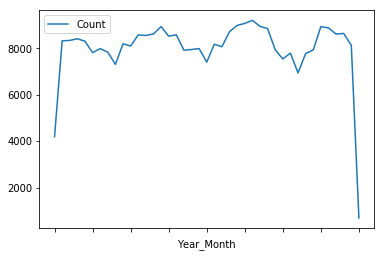

In [12]:
df.plot.line()

### first and last data points are making the series uneven so removing them

In [13]:
df_ts = df.drop(df.index[40])
df_ts = df_ts.drop(df.index[0])

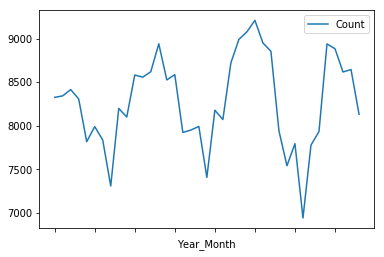

In [14]:
df_ts.plot.line()

### saving the data in a csv file to model it in R

In [15]:
df_ts.to_csv("c:/Users/sastu/Downloads/ts_boston_crime.csv", index=False)